In [165]:
#there are 3 model 
#1st - including 0 in Incomes gives as 12% accuracy on prediction through all categories. Reducing amount of categories reduces correlation to 3%
#2nd - excluding 0 Incomes and Unemployed gives us 84% accuracy on all categories
#3rd - excluding 0 Incomes and Unemployed and some other categories gives us 77% accuracy

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import math
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [166]:
data = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')

In [167]:
data.columns = [e.lower().replace(' ', '_') for e in data.columns]

In [168]:
{col:data[col].unique() for col in data.select_dtypes([np.object]).columns} #dictionary comprehention

{'customer': array(['BU79786', 'QZ44356', 'AI49188', ..., 'TD14365', 'UP19263',
        'Y167826'], dtype=object),
 'state': array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
       dtype=object),
 'response': array(['No', 'Yes'], dtype=object),
 'coverage': array(['Basic', 'Extended', 'Premium'], dtype=object),
 'education': array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
       dtype=object),
 'effective_to_date': array(['2/24/11', '1/31/11', '2/19/11', '1/20/11', '2/3/11', '1/25/11',
        '1/18/11', '1/26/11', '2/17/11', '2/21/11', '1/6/11', '2/6/11',
        '1/10/11', '1/17/11', '1/5/11', '2/27/11', '1/14/11', '1/21/11',
        '2/5/11', '1/29/11', '2/28/11', '2/12/11', '2/2/11', '2/7/11',
        '1/22/11', '2/13/11', '1/15/11', '1/8/11', '1/11/11', '1/28/11',
        '2/8/11', '2/23/11', '1/2/11', '2/16/11', '1/27/11', '1/23/11',
        '1/9/11', '2/11/11', '2/4/11', '2/1/11', '2/15/11', '2/26/11',
        '1/16/11', '1/1/11', '2/

In [169]:
data = data.drop_duplicates()

In [170]:
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'], errors='coerce')

In [171]:
def replace_nans(x):
    if not x == x:
        return '0'
    else:
        return x

In [172]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


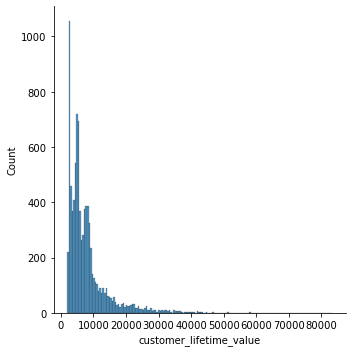

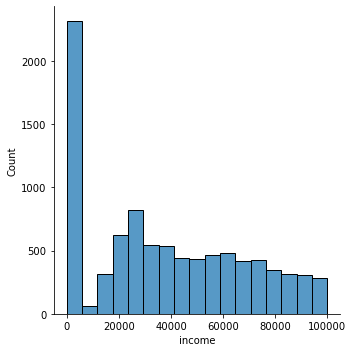

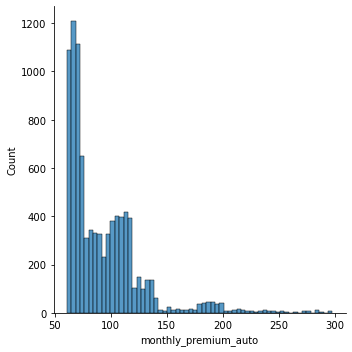

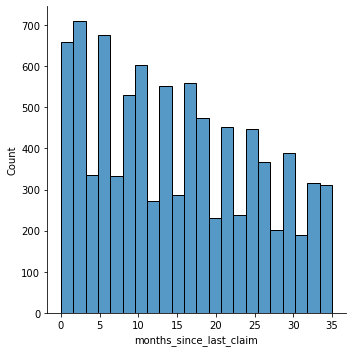

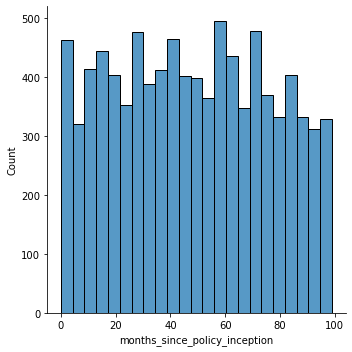

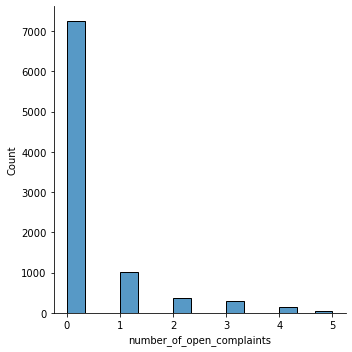

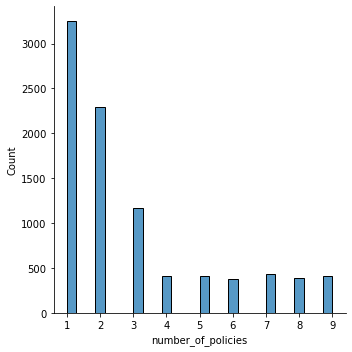

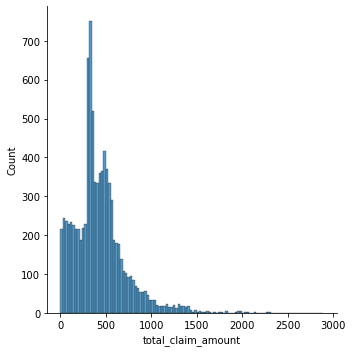

In [173]:
numericals = data._get_numeric_data()
for x in numericals.columns:
    sns.displot(numericals[x])
plt.show()

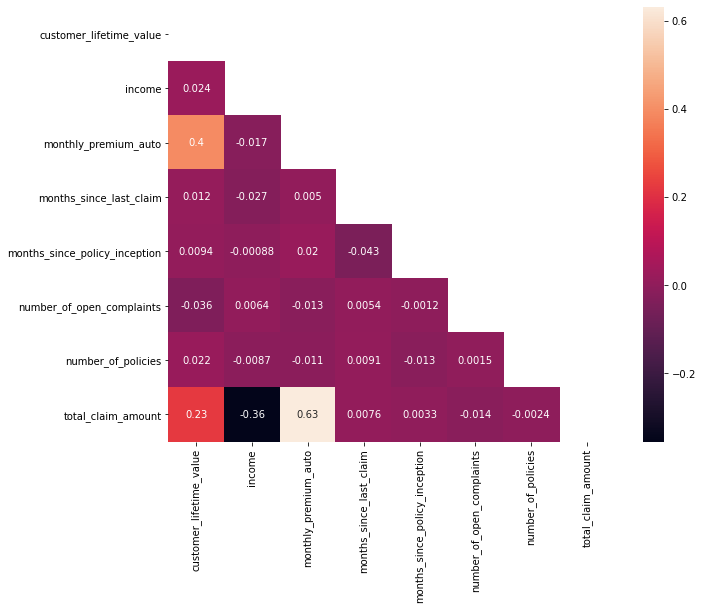

In [174]:
correlations_matrix = data.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [175]:
data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [176]:
data2 = data

In [177]:
X_num = data.select_dtypes(include = np.number).drop(['customer_lifetime_value'], axis = 1)
X_cat = data.select_dtypes(include = np.object)

In [178]:
X_cat = X_cat.drop(['customer'], axis=1)

In [179]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
x_normalized = Normalizer().fit_transform(X_num)
x_standardized = StandardScaler().fit_transform(X_num)
print(x_standardized.shape)

(9134, 7)


In [180]:
X_cat2 = X_cat.drop(['response', 'education', 'location_code', 'employmentstatus', 'vehicle_class'], axis=1)

In [181]:
from sklearn.preprocessing import OneHotEncoder
encoded = OneHotEncoder(handle_unknown='error', drop='first').fit_transform(X_cat).toarray()
encoded

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 1., 0.]])

In [182]:
X = np.concatenate((x_normalized, encoded), axis=1)
Y = data['customer_lifetime_value']

In [183]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state=100)

In [184]:
from sklearn.linear_model import LinearRegression
lm = linear_model.LinearRegression()
model = lm.fit(X_train,Y_train)
predictions  = lm.predict(X_test)
r2_score(Y_test, predictions)

0.1212789540214293

In [185]:
len(lm.predict(X_test))

3654

In [186]:
mse = mean_squared_error(Y_test, predictions)
print(mse)

42172190.36840793


In [187]:
rmse = math.sqrt(mse)
print(rmse)

6494.011885453238


In [188]:
n = len(X_test) 
p = X_test.shape[1]
r2 = r2_score(Y_test, predictions)
adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))
adj_r2

0.1090846569637195

In [189]:
data2 = data2.drop(['customer'], axis = 1)
data2 = data2[(data2[['income']] !=0).all(axis=1)]
data2 = data2[(data2[['employmentstatus']] !="Unempoyed").all(axis=1)]
X_num2 = data2.select_dtypes(include = np.number)
X_cat3 = data2.select_dtypes(include = np.object)

In [190]:
X_cat4 = X_cat3.drop(['response', 'education', 'location_code', 'employmentstatus', 'vehicle_class'], axis=1)

In [191]:
from sklearn.preprocessing import Normalizer
x_normalized2 = Normalizer().fit_transform(X_num2)
x_standardized2 = StandardScaler().fit_transform(X_num2)
print(x_standardized2.shape)

(6817, 8)


In [192]:
from sklearn.preprocessing import OneHotEncoder
encoded2 = OneHotEncoder(handle_unknown='error', drop='first').fit_transform(X_cat3).toarray()
encoded2

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [193]:
X2 = np.concatenate((x_normalized2, encoded2), axis=1)
Y2 = data2['customer_lifetime_value']

In [194]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.4, random_state=100)

In [195]:
from sklearn.linear_model import LinearRegression
lm2 = linear_model.LinearRegression()
model2 = lm.fit(X2_train,Y2_train)
predictions2  = lm.predict(X2_test)
r2_score(Y2_test, predictions2)

0.8420171482326521

In [196]:
len(lm.predict(X2_test))

2727

In [197]:
mse2 = mean_squared_error(Y2_test, predictions2)
print(mse)

42172190.36840793


In [198]:
rmse = math.sqrt(mse2)
print(rmse)

2769.574074995601


In [199]:
n = len(X2_test) 
p = X2_test.shape[1]
r2 = r2_score(Y2_test, predictions2)
adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))
adj_r2

0.8390653012265357

In [200]:
from sklearn.preprocessing import Normalizer
x_normalized2 = Normalizer().fit_transform(X_num2)
x_standardized2 = StandardScaler().fit_transform(X_num2)
print(x_standardized2.shape)

(6817, 8)


In [201]:
from sklearn.preprocessing import OneHotEncoder
encoded2 = OneHotEncoder(handle_unknown='error', drop='first').fit_transform(X_cat4).toarray()
encoded2

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [202]:
X2 = np.concatenate((x_normalized2, encoded2), axis=1)
Y2 = data2['customer_lifetime_value']

In [203]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.4, random_state=100)

In [204]:
from sklearn.linear_model import LinearRegression
lm2 = linear_model.LinearRegression()
model2 = lm.fit(X2_train,Y2_train)
predictions2  = lm.predict(X2_test)
r2_score(Y2_test, predictions2)

0.7704349314289756

In [205]:
len(lm.predict(X2_test))

2727

In [206]:
mse2 = mean_squared_error(Y2_test, predictions2)
print(mse)

42172190.36840793


In [207]:
rmse = math.sqrt(mse2)
print(rmse)

3338.5732800851765


In [208]:
n = len(X2_test) 
p = X2_test.shape[1]
r2 = r2_score(Y2_test, predictions2)
adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))
adj_r2

0.7674491352937152